# MNIST Deep Neural Networks Comparison

In [1]:
import numpy as np
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import matplotlib.pyplot as plt


from neural_net_one_layer import NeuralNetMLP_OneHidden, train_one_hidden
from neural_net_two_layers import NeuralNetMLP_TwoHidden, train_two_hidden
from pytorch_nn import PyTorchNN, train_pytorch
from utils import calculate_macro_auc

In [2]:
RANDOM_SEED = 123
np.random.seed(RANDOM_SEED)
torch.set_default_dtype(torch.float64)
torch.manual_seed(RANDOM_SEED)

### Loading the MNIST Dataset

In [3]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist.data.to_numpy(), mnist.target.to_numpy().astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

Training set size: 49000
Test set size: 21000
Number of features: 784
Number of classes: 10


### Neural Networks Configurations
For all networks, MSE is used as the loss function. Also, a batch size of 100 is used in the training.

In [4]:
num_features = X_train.shape[1]
numpy_hidden = 50
torch_hidden = 500
num_classes = 10
num_epochs_numpy = 20
num_epochs_pytorch = 50
learning_rate_numpy = 0.1
learning_rate_pytorch = 0.1
batch_size = 100

print("Architecture Configuration:")
print(f"  Input Features: {num_features}")
print(f"  Hidden Layers for NumPy: {numpy_hidden} neurons")
print(f"  Hidden Layers for PyTorch: {torch_hidden} neurons")
print(f"  Output Classes: {num_classes}")
print(f"  NumPy Learning rate: {learning_rate_numpy}")
print(f"  PyTorch Learning rate: {learning_rate_pytorch}")
print(f"  NumPy Epochs: {num_epochs_numpy}")
print(f"  Batch Size: {batch_size}")
print(f"  PyTorch Epochs: {num_epochs_pytorch}")

results = {}

Architecture Configuration:
  Input Features: 784
  Hidden Layers for NumPy: 50 neurons
  Hidden Layers for PyTorch: 500 neurons
  Output Classes: 10
  NumPy Learning rate: 0.1
  PyTorch Learning rate: 0.1
  NumPy Epochs: 20
  Batch Size: 100
  PyTorch Epochs: 50


### 1. Training Original Network (Single Hidden Layer)
This is the original one-hidden layer network provided. The hidden layer has 50 neurons, and the activations functions of the hidden layer and the output layer is Sigmoid. The optimizations of the network is done using gradient descent with a learning rate of 0.1. The training consists 20 epochs.

In [5]:
start_time = time.time()
model_one = NeuralNetMLP_OneHidden(
    num_features=num_features,
    num_hidden=numpy_hidden,
    num_classes=num_classes,
    random_seed=RANDOM_SEED
)

losses_one, train_accs_one, test_accs_one = train_one_hidden(
    model_one, X_train, y_train, X_test, y_test, num_epochs_numpy, 
    learning_rate_numpy, batch_size)

macro_auc_one = calculate_macro_auc(model_one, X_test, y_test, num_classes, 'numpy_one')
time_one = time.time() - start_time

print(f"\nFinal Results:")
print(f"  Test Accuracy: {test_accs_one[-1]*100:.2f}%")
print(f"  Macro AUC: {macro_auc_one:.4f}")
print(f"  Training Time: {time_one:.2f}s")

results['one_hidden'] = {
    'accuracy': test_accs_one[-1],
    'macro_auc': macro_auc_one,
    'time': time_one,
    'losses': losses_one,
    'train_accs': train_accs_one,
    'test_accs': test_accs_one
}

Epoch: 000/020 | Loss: 0.0430 | Train Acc: 80.92% | Test Acc: 80.88%
Epoch: 005/020 | Loss: 0.0163 | Train Acc: 91.19% | Test Acc: 90.76%
Epoch: 010/020 | Loss: 0.0130 | Train Acc: 92.70% | Test Acc: 92.17%
Epoch: 015/020 | Loss: 0.0113 | Train Acc: 93.52% | Test Acc: 92.77%

Final Results:
  Test Accuracy: 93.16%
  Macro AUC: 0.9898
  Training Time: 2.59s


### 2. Training Extended Network (Two Hidden Layers)
This network is an extension of the original MLP adding another hidden layer. This layer also has 50 neurons and a Sigmoid activation function. The training consists 20 epochs.

In [6]:
start_time = time.time()
model_two = NeuralNetMLP_TwoHidden(
    num_features=num_features,
    num_hidden1=numpy_hidden,
    num_hidden2=numpy_hidden,
    num_classes=num_classes,
    random_seed=RANDOM_SEED
)

losses_two, train_accs_two, test_accs_two = train_two_hidden(
    model_two, X_train, y_train, X_test, y_test, num_epochs_numpy, 
    learning_rate_numpy, batch_size)

macro_auc_two = calculate_macro_auc(model_two, X_test, y_test, num_classes, 'numpy_two')
time_two = time.time() - start_time

print(f"\nFinal Results:")
print(f"  Test Accuracy: {test_accs_two[-1]*100:.2f}%")
print(f"  Macro AUC: {macro_auc_two:.4f}")
print(f"  Training Time: {time_two:.2f}s")

results['two_hidden'] = {
    'accuracy': test_accs_two[-1],
    'macro_auc': macro_auc_two,
    'time': time_two,
    'losses': losses_two,
    'train_accs': train_accs_two,
    'test_accs': test_accs_two
}

Epoch: 000/020 | Loss: 0.0885 | Train Acc: 21.84% | Test Acc: 21.88%
Epoch: 005/020 | Loss: 0.0316 | Train Acc: 85.92% | Test Acc: 85.71%
Epoch: 010/020 | Loss: 0.0171 | Train Acc: 90.53% | Test Acc: 90.25%
Epoch: 015/020 | Loss: 0.0136 | Train Acc: 92.13% | Test Acc: 91.53%

Final Results:
  Test Accuracy: 92.25%
  Macro AUC: 0.9885
  Training Time: 3.34s


### 3. Training PyTorch Network (Two Hidden Layers)
This network is a PyTorch implementation of the network seen in class. The network has 2 hidden layers, both with 500 layers and Sigmoid activation functions. The output layer has a Softmax activation function. The network is trained using the PyTorch `SGD` optimizer (stochastic gradient descent) with learning rate of 0.1. The training consists 50 epochs.

In [7]:
start_time = time.time()
model_pytorch = PyTorchNN(
    num_features=num_features,
    num_hidden1=torch_hidden,
    num_hidden2=torch_hidden,
    num_classes=num_classes
)

losses_pytorch, train_accs_pytorch, test_accs_pytorch = train_pytorch(
    model_pytorch, X_train, y_train, X_test, y_test, num_epochs_pytorch, 
    learning_rate_pytorch, batch_size)

macro_auc_pytorch = calculate_macro_auc(model_pytorch, X_test, y_test, num_classes, 'pytorch')
time_pytorch = time.time() - start_time

print(f"\nFinal Results:")
print(f"  Test Accuracy: {test_accs_pytorch[-1]*100:.2f}%")
print(f"  Macro AUC: {macro_auc_pytorch:.4f}")
print(f"  Training Time: {time_pytorch:.2f}s")

results['pytorch'] = {
    'accuracy': test_accs_pytorch[-1],
    'macro_auc': macro_auc_pytorch,
    'time': time_pytorch,
    'losses': losses_pytorch,
    'train_accs': train_accs_pytorch,
    'test_accs': test_accs_pytorch
}

Epoch: 000/050 | Loss: 0.0896 | Train Acc: 11.25% | Test Acc: 11.25%
Epoch: 005/050 | Loss: 0.0891 | Train Acc: 29.99% | Test Acc: 30.34%
Epoch: 010/050 | Loss: 0.0879 | Train Acc: 28.74% | Test Acc: 28.50%
Epoch: 015/050 | Loss: 0.0733 | Train Acc: 34.22% | Test Acc: 33.93%
Epoch: 020/050 | Loss: 0.0562 | Train Acc: 60.25% | Test Acc: 60.30%
Epoch: 025/050 | Loss: 0.0405 | Train Acc: 76.59% | Test Acc: 76.60%
Epoch: 030/050 | Loss: 0.0291 | Train Acc: 83.52% | Test Acc: 83.48%
Epoch: 035/050 | Loss: 0.0297 | Train Acc: 86.50% | Test Acc: 86.49%
Epoch: 040/050 | Loss: 0.0212 | Train Acc: 88.28% | Test Acc: 88.23%
Epoch: 045/050 | Loss: 0.0198 | Train Acc: 89.42% | Test Acc: 89.27%

Final Results:
  Test Accuracy: 89.79%
  Macro AUC: 0.9895
  Training Time: 45.23s


### Comparison Summary

In [8]:
print("\n" + "=" * 80)
print("COMPARISON SUMMARY")
print("=" * 80)
print(f"\n{'Model':<30} {'Test Accuracy':<15} {'Macro AUC':<15} {'Time (s)':<10}")
print("-" * 80)
print(f"{'1. Single Hidden Layer':<30} {results['one_hidden']['accuracy']*100:>12.2f}%  "
        f"{results['one_hidden']['macro_auc']:>12.4f}  {results['one_hidden']['time']:>8.2f}")
print(f"{'2. Two Hidden Layers':<30} {results['two_hidden']['accuracy']*100:>12.2f}%  "
        f"{results['two_hidden']['macro_auc']:>12.4f}  {results['two_hidden']['time']:>8.2f}")
print(f"{'3. PyTorch (Two Hidden)':<30} {results['pytorch']['accuracy']*100:>12.2f}%  "
        f"{results['pytorch']['macro_auc']:>12.4f}  {results['pytorch']['time']:>8.2f}")
print("-" * 80)

print("\nPerformance Analysis:")
auc_improvement = (results['two_hidden']['macro_auc'] - results['one_hidden']['macro_auc']) / results['one_hidden']['macro_auc'] * 100
print(f"  Two hidden layers vs Single: {auc_improvement:+.2f}% AUC change")

best_model = max(results.keys(), key=lambda k: results[k]['macro_auc'])
best_name = {'one_hidden': 'Single Hidden Layer', 
                'two_hidden': 'Two Hidden Layers', 
                'pytorch': 'PyTorch'}[best_model]
print(f"  Best performing model: {best_name} (AUC: {results[best_model]['macro_auc']:.4f})")


COMPARISON SUMMARY

Model                          Test Accuracy   Macro AUC       Time (s)  
--------------------------------------------------------------------------------
1. Single Hidden Layer                93.16%        0.9898      2.59
2. Two Hidden Layers                  92.25%        0.9885      3.34
3. PyTorch (Two Hidden)               89.79%        0.9895     45.23
--------------------------------------------------------------------------------

Performance Analysis:
  Two hidden layers vs Single: -0.13% AUC change
  Best performing model: Single Hidden Layer (AUC: 0.9898)


#### Plotting Results

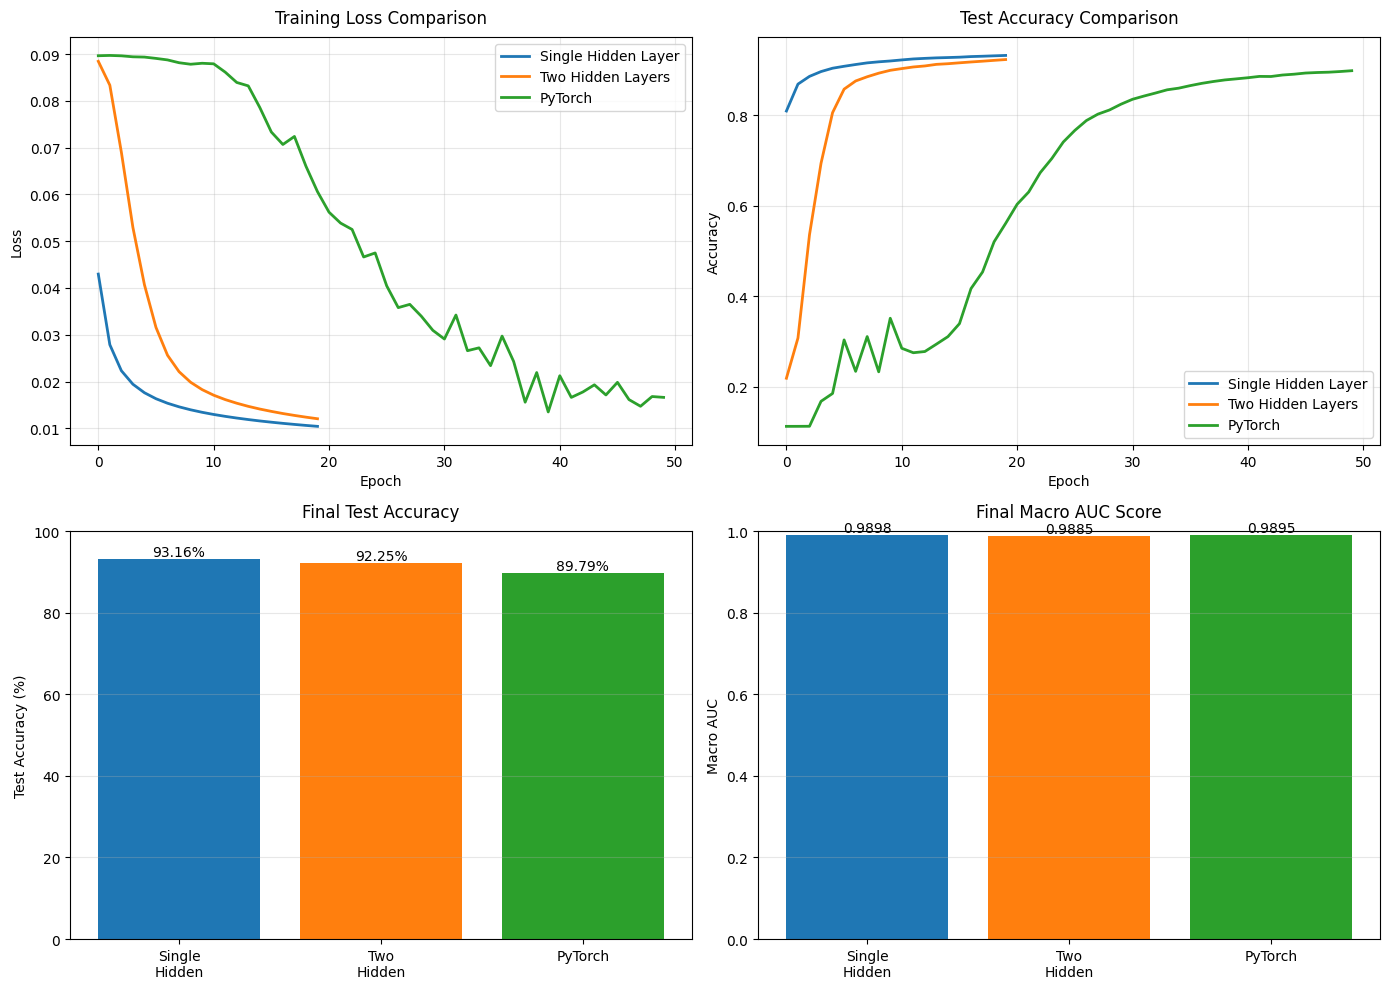

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Training Loss Comparison
ax = axes[0, 0]
ax.plot(results['one_hidden']['losses'], label='Single Hidden Layer', linewidth=2)
ax.plot(results['two_hidden']['losses'], label='Two Hidden Layers', linewidth=2)
ax.plot(results['pytorch']['losses'], label='PyTorch', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training Loss Comparison', pad=10)
ax.legend()
ax.grid(True, alpha=0.3)

# Test Accuracy Comparison
ax = axes[0, 1]
ax.plot(results['one_hidden']['test_accs'], label='Single Hidden Layer', linewidth=2)
ax.plot(results['two_hidden']['test_accs'], label='Two Hidden Layers', linewidth=2)
ax.plot(results['pytorch']['test_accs'], label='PyTorch', linewidth=2)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Test Accuracy Comparison', pad=10)
ax.legend()
ax.grid(True, alpha=0.3)

# Final Test Accuracy Bar Plot
ax = axes[1, 0]
models = ['Single\nHidden', 'Two\nHidden', 'PyTorch']
accuracies = [
    results['one_hidden']['accuracy']*100,
    results['two_hidden']['accuracy']*100,
    results['pytorch']['accuracy']*100
]
bars = ax.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_ylabel('Test Accuracy (%)')
ax.set_title('Final Test Accuracy', pad=10)
ax.set_ylim([0, 100])

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%', ha='center', va='bottom')
ax.grid(True, alpha=0.3, axis='y')

# Final Macro AUC Bar Plot
ax = axes[1, 1]
aucs = [
    results['one_hidden']['macro_auc'],
    results['two_hidden']['macro_auc'],
    results['pytorch']['macro_auc']
]
bars = ax.bar(models, aucs, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_ylabel('Macro AUC')
ax.set_title('Final Macro AUC Score', pad=10)
ax.set_ylim([0, 1])

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [10]:
np.savez('results.npz', 
        one_hidden=results['one_hidden'],
        two_hidden=results['two_hidden'],
        pytorch=results['pytorch'])
print("\nResults saved to 'results.npz'")


Results saved to 'results.npz'


### Evaluation of Results
As can be seen, the training loss and test accuracy of the PyTorch network is more noisy than the NumPy manual implementations. Moreover, the single hidden layer network performed best - it achieved the least training loss, the highest test accuracies (across training too) and the highest macro AUC (although slightly higher than the PyTorch implementation).

The PyTorch network achieved the least final test accuracy - this may be due to insufficient epochs amount. The network has more neurons than the other two, and may need more training epochs to achieve better results. Indeed, after 20 epochs, when the NumPy networks finished training, the PyTorch network's test accuracy was only 60.3%. Other factors that may indicate the difference of results is that the PyTorch network uses Softmax as the last activation function and not Sigmoid, and also the internal implementation of PyTorch may affect it as well.

However, regarding the macro AUC, the PyTorch network did achieve better results than the NumPy two layer implementation.